In [ ]:
import numpy as np 
import pandas as pd 
import xarray as xr
import matplotlib.pyplot as plt 

# Uncomment below line when new kernel starts
# import dask
# import zarr

In [ ]:
# Define the path to your zarr dataset
zarr_path = '/scratch/tsany/clim680_dataset/xBase'

# Open the dataset using xarray
ds = xr.open_zarr(zarr_path)
ds

NameError: name 'xr' is not defined

In [8]:
!du -h -d 0 /scratch/tsany/clim680_dataset/xBase

44G	/scratch/tsany/clim680_dataset/xBase


In [1]:
# RUN THIS CELL CAUTIOUSLY
# Input Zarr dataset path
# input_zarr_path ="/scratch/tsany/clim680_dataset/xBase" # Commented out for reduce risk

# Open the Zarr dataset with Dask
ds = xr.open_zarr(input_zarr_path, consolidated=False)

# Define the time range you're interested in
start_date = '2001-01-01'
end_date = '2004-12-31'

# Generate time slices
time_slices = pd.date_range(start=start_date, end=end_date, freq='1AS')

# Output Zarr dataset path
# output_zarr_path = "/scratch/tsany/xBase_sliced_2004" # Commented out for reduce risk

# Initialize the Zarr store with a single time step to set the dimensions
ds.isel(time=slice(0, 1)).to_zarr(output_zarr_path, mode='w')

# Save each time slice to the new Zarr store
for start, end in zip(time_slices[:-1], time_slices[1:]):
    ds_sliced = ds.sel(time=slice(start, end - pd.Timedelta(days=1)))
    ds_sliced.to_zarr(output_zarr_path, mode='a', append_dim='time')


In [2]:
!du -h -d 0 /scratch/tsany/xBase_sliced_2004

21G	/scratch/tsany/xBase_sliced_2004


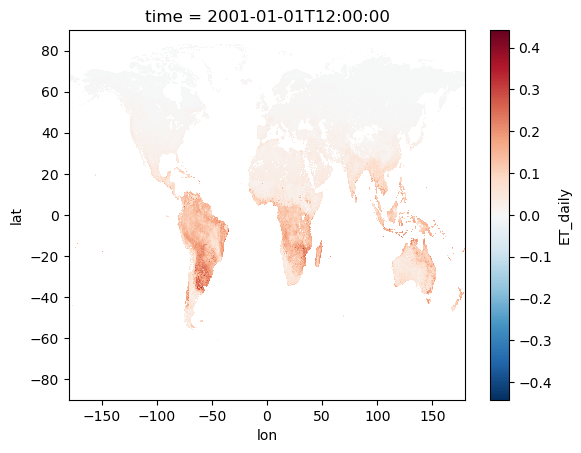

In [5]:
n = xr.open_zarr('/scratch/tsany/xBase_sliced_2004')
n.ET_daily[0,:,:].plot()

In [11]:
!mv /scratch/tsany/clim680_dataset ~